In [ ]:
!pip install astropy==5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyregion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import pyregion

First we mount the drive to the notebook file and then we set the path for the files we will be using

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pathd = '/content/drive/MyDrive/Codes/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading and Plotting FITS files

In [ ]:
nfile = 'Galaxyfits/NGC5258_s_concat_uvt_dot75asec_rbeam1asec_csdot1.pbcor_hcorr.fits'

Fetch the FITS file from directory

In [ ]:
image = fits.open('/content/drive/MyDrive/Codes/Galaxyfits/NGC5258_s_concat_uvt_dot75asec_rbeam1asec_csdot1.pbcor_hcorr.fits')[0]
image_header = image.header

Creating a WCS object from the FITS header in order to use as a projection argument when plotting the image in equatorial coordinates

In [ ]:
wcs_galaxy = WCS(image_header)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'.


Plotting the image

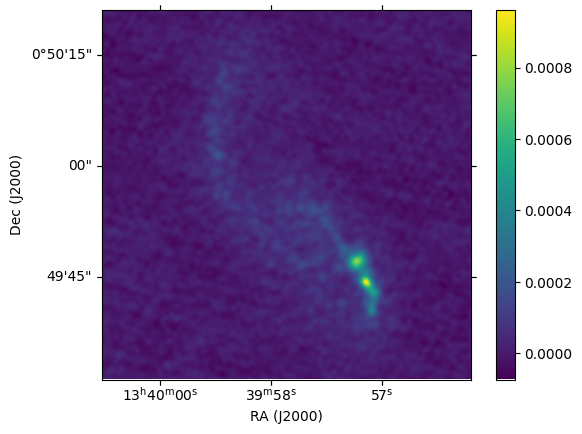

In [ ]:
fig = plt.figure()
ax = plt.subplot(projection=wcs_galaxy)
plt.imshow(image.data, origin='lower', cmap='viridis')
plt.xlabel(r'RA (J2000)')
plt.ylabel(r'Dec (J2000)')
plt.colorbar()

Data displayed in the image avobe corresponds to flux density (Jy/beam), if we want to plot Luminosity instead, we can do the conversion of the data, since it is storaged as a mutidimensional numpy array

In [ ]:
L      = image.data / (4*np.pi*(10000)**2)
L_data = L / (1.828*10**26) #conversion to solar luminosity

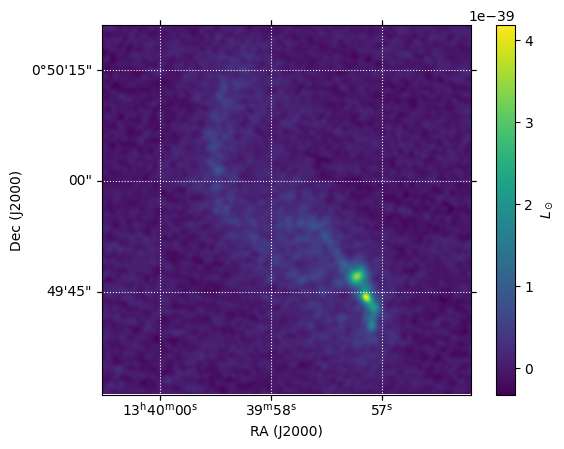

In [ ]:
fig = plt.figure()
ax = plt.subplot(projection=wcs_galaxy)
plt.imshow(L_data, origin='lower', cmap='viridis')
plt.xlabel(r'RA (J2000)')
plt.ylabel(r'Dec (J2000)')
cbar = plt.colorbar()
cbar.set_label('$L_\odot$')
plt.grid(color='white', ls='dotted')

## Working with Regions

You can load a predetermined region using the `pyregion.open()` or the `pyregion.parse()` methods, in this case since we have ds9 generated regions in .reg format we can use the first one. Note that we also add `as_imagecoord()` since it loads the image in a fk5 coordinate format by default, so we need to specify that we want to use the coord format that is in the FITS header

In [ ]:
region1 = pyregion.open(pathd + 'Regions/brightclump1.reg').as_imagecoord(image_header)
region2 = pyregion.open(pathd + 'Regions/noisyclump1.reg').as_imagecoord(image_header)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'.
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'.


In [46]:
region1[0].coord_format #checking the coordinates format

'image'

Creating a mask for each of the two regions

In [ ]:
mask1 = region1.get_mask(shape=L_data.shape)
mask2 = region2.get_mask(shape=L_data.shape)

Plotting the regions

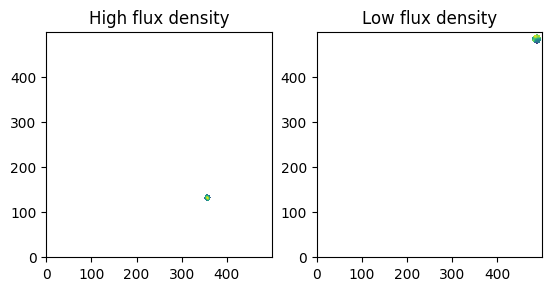

In [49]:
masked_image_1 = np.ma.masked_array(image.data, mask=~mask1)
masked_image_2 = np.ma.masked_array(image.data, mask=~mask2)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(masked_image_1, origin='lower')
ax1.set_title('High flux density')
ax2.imshow(masked_image_2, origin='lower')
ax2.set_title('Low flux density')
# plt.imshow(masked_image_1, origin='lower')
plt.show()

In [ ]:
total_flux_density =